# ANÁLISE DOS PROCESSOS SELETIVOS

Planejo aqui analisar as inscrições e resultados de efetivação dos últimos Processos Seletivos da Ecomp.

---

### Da origem dos dados

Ao longo dos últimos dias, compilei tudo que encontrei no Drive da Ecomp relacionado as inscrições dos Processos Seletivos de 2016 e 2017. As tabelas possuíam campos diferentes, mas, para minha sorte, alguns bem importantes estavam sempre presentes. 

---

### Dos dados

 - PS 1 = 2016-1
 - PS 2 = 2016-2
 - PS 3 = 2017-1
 - PS 4 = 2017-2
 - PS 5 = 2018-1
 
Como **todo** candidato tem um nome, podemos utilizar ele para realizar a contagem nos *groupBy*! Em alguns casos, renomeei a coluna para refletir o que esta indica.
 
Os campos **"Amigos"**, **"Facebook"**, **"Semana Acadêmica"**, **"Semana do Calouro"**, **"Site"**, **"Outro"** se complementam. Eles representam as opções que o inscrito selecionou no momento da inscrição.

Os campos de celular e email foram ignorados e retirados da base, uma vez que para a análise não teriam propósito algum.

O campo de "Efetivação" foi criado e preenchido manualmente. Ele vale para todos os PSs.

Os campos Grupo, Entrevista, Trainee e Data da inscrição valem **apenas** para o PS 5, uma vez que não eram coletados antigamente.

É **possível** descobrir a data que o inscritou entrou no curso, podendo fornecer informações novas. Entretanto, isso envolve tratamento dos dados de GRR. Um ponto negativo é quem nem todos os GRRs estão preenchidos.

Dados que seriam extremamente úteis porém não existem são:
 - Inscrição veio do papel ou formulário? *existente no PS 5*
 - Inscrito foi efetivado? *existente no PS 5*
 - Caso tenha desistido no processo, em qual etapa desistiu? *existente no PS 5*
 - Opinião em relação ao Processo (?)
 - Data da inscrição *existente no PS 5*
 
Para outras análises, é interessante que se saiba exatamente quando um membro entrou e saiu. Isso nos permite analisar a rotatividade entre os membros da Ecomp e extrair informações relacionadas a permanência de cada curso.
 
 ---

Importando as bibliotecas necessárias:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# Pegando os dados
inscricoes_df = pd.read_csv('inscricoes - v4.csv', sep=',')
inscricoes_df[['PS']] = inscricoes_df[['PS']].astype('int')
inscricoes_df['Data da inscrição'] = pd.to_datetime(inscricoes_df['Data da inscrição'], errors ='coerce').dt.date

Prévia dos dados:

In [3]:
inscricoes_df.columns.values


array(['Nome', 'GRR', 'Curso', 'Amigos', 'Facebook', 'Semana Acadêmica',
       'Semana dos Calouros', 'Site', 'Outro', 'PS', 'Star', 'Grupo',
       'Entrevista', 'Trainee', 'Efetivado', 'Data da inscrição', 'Papel'],
      dtype=object)

In [4]:
inscricoes_df.describe()

,PS,Star,Efetivado,Papel
count,285.000000,6.0,67.0,51.0
mean,3.463158,1.0,1.0,1.0
std,1.420255,0.0,0.0,0.0
min,1.000000,1.0,1.0,1.0
25%,3.000000,1.0,1.0,1.0
50%,3.000000,1.0,1.0,1.0
75%,5.000000,1.0,1.0,1.0
max,5.000000,1.0,1.0,1.0


Podemos perceber que:
 - Nossa base tem 178 inscritos em Processos Seletivos
 - 41 Destes foram efetivados
 
 //todo atualizar para o PS 5
 
---

In [5]:
inscricoes_df.head()

,Nome,GRR,Curso,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Site,Outro,PS,Star,Grupo,Entrevista,Trainee,Efetivado,Data da inscrição,Papel
0,Rodrigo Yuji Koga Kuroda,GRR20166364,BCC,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guilherme Morais Lopes dos Santos,20163043,BCC,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lucas Sidnei dos Santos,20163040,BCC,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lucas Eduardo,NaN,BCC,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bruna Luisa Romanichen Andrade,NaN,IBM,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
inscricoes_df.tail()

,Nome,GRR,Curso,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Site,Outro,PS,Star,Grupo,Entrevista,Trainee,Efetivado,Data da inscrição,Papel
280,Gustavo Valente Nunes,20182557,BCC,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,Passou,Reprovou,Desclassificado,NaN,2018-02-21,1.0
281,Mauricio Nogueira Lopes,GRR20184530,TADS,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,5,NaN,Passou,Reprovou,Desclassificado,NaN,2018-02-21,NaN
282,Vinicius Augusto Dilay de Paula,20182597,BCC,Amigos,NaN,NaN,Semana dos Calouros,NaN,NaN,5,NaN,Passou,Reprovou,Desclassificado,NaN,2018-02-21,NaN
283,Vitor B. Fernandes,20185483,TADS,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,Passou,Reprovou,Desclassificado,NaN,2018-02-20,1.0
284,William Yip,20185048,TADS,Amigos,NaN,NaN,NaN,NaN,NaN,5,NaN,Passou,Reprovou,Desclassificado,NaN,2018-03-04,NaN


Com o head e tail, podemos observar que as colunas [Amigos, Facebook, Semana Acadêmica, Semana do Calouro, Site e Outro] funcionam de maneira complementar. Também, analisando o 3, "Lucas Eduardo", podemos observar que nem sempre os campos estão preenchidos.

In [7]:
inscricoes_df.groupby('PS').count()

,Nome,GRR,Curso,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Site,Outro,Star,Grupo,Entrevista,Trainee,Efetivado,Data da inscrição,Papel
PS,,,,,,,,,,,,,,,,
1,40,35,40,6,5,0,28,0,0,0,0,0,0,5,0,0
2,28,27,28,9,18,5,0,0,0,0,0,0,0,11,0,0
3,80,72,80,0,0,0,0,0,0,0,0,0,0,16,0,0
4,34,33,34,21,12,0,14,0,0,0,0,0,0,9,0,0
5,103,98,103,26,10,0,21,3,7,6,103,103,103,26,103,51


É fácil perceber que os Processos Seletivos de começo de ano [2016-1, 2017-1] tem uma quantidade bem maior de inscritos. Também pode-se ver o crescimento de 2016 para 2017. 

Além disso, pode-se observar que os processos seletivos de segundo semestre tem mais recomendações de amigos do que os do primeiro semestre.

Uma falha grande em nossos dados é a ausência da origem da inscrição durante o PS 2017-1. Isso poderá afetar nossa análise da origem dos membros.

In [8]:
inscricoes_df[['Curso', 'PS']].groupby('Curso').count()

,PS
Curso,
BCC,125
IBM,26
TADS,134


Podemos ver que a predominância de inscrições de BCC sobre TADS é inexistente. O contrário é verdade. Também, é possível observar que a frequência de inscrições de IBM é baixíssima ao longo dos anos.

***

In [9]:
# Contagem de inscritos de cada curso, em cada PS
insc_curso_ps_df = inscricoes_df[['Nome', 'Curso', 'PS']].groupby(['Curso', 'PS']).count()
insc_curso_ps_df = insc_curso_ps_df.reset_index()

# Ordenando os valores em relação ao PS
insc_curso_ps_df.sort_values(by=['PS'], ascending=True, inplace=True)
display(insc_curso_ps_df)

,Curso,PS,Nome
0,BCC,1,22
5,IBM,1,4
10,TADS,1,14
1,BCC,2,14
6,IBM,2,1
11,TADS,2,13
2,BCC,3,31
7,IBM,3,10
12,TADS,3,39
3,BCC,4,15


Observa-se que nos últimos dois Processos Seletivos, o curso de TADS teve mais inscritos que BCC e IBM. Porém, isso foi crescendo aos poucos!

Mas imagens explicam melhor!

---

#### Analisando as inscrições de maneira visual

,Inscritos
PS,
1,40
2,28
3,80
4,34
5,103


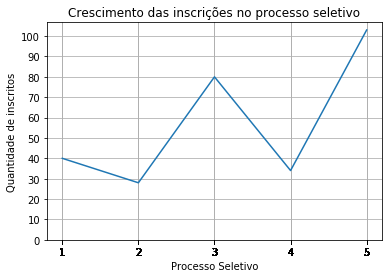

In [10]:
insc_total_df = inscricoes_df[['Nome', 'PS']].groupby(['PS']).count()
insc_total_df = insc_total_df.rename(columns={'Nome': 'Inscritos'})
display(insc_total_df)

plt.plot(insc_total_df['Inscritos'])
plt.xticks(inscricoes_df['PS'])
plt.yticks(np.linspace(0, 100, 11))
plt.xlabel('Processo Seletivo')
plt.ylabel('Quantidade de inscritos')
plt.title('Crescimento das inscrições no processo seletivo')
plt.grid(True)
plt.show()

---

Efetuando algumas comparações mais complexas:

,Efetivados
PS,
1,5
2,11
3,16
4,9
5,26


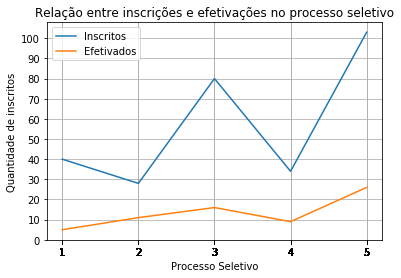

In [11]:
insc_efet_total_df = inscricoes_df.loc[inscricoes_df['Efetivado'] == 1]
insc_efet_total_df = insc_efet_total_df[['PS', 'Efetivado']].groupby(['PS']).count()
insc_efet_total_df = insc_efet_total_df.rename(columns={'Efetivado': 'Efetivados'})
display(insc_efet_total_df)

#Conjunto de 11 valores entre 0 e 100
y_label = np.linspace(0, 100, 11)

plt.plot(insc_total_df['Inscritos'])
plt.plot(insc_efet_total_df['Efetivados'])
plt.xticks(inscricoes_df['PS'])
plt.yticks(y_label)
plt.xlabel('Processo Seletivo')
plt.ylabel('Quantidade de inscritos')
plt.title('Relação entre inscrições e efetivações no processo seletivo')
plt.grid(True)
plt.legend()
plt.show()

---

Analisando as inscrições de cada curso em cada PS

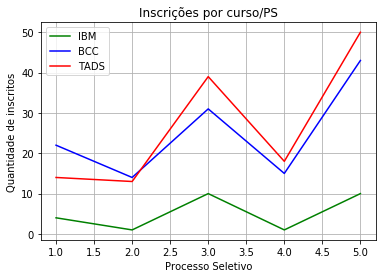

In [12]:
# Refazendo a contagem de inscritos de cada curso, em cada PS
insc_curso_ps_df = inscricoes_df[['Nome', 'Curso', 'PS']].groupby(['Curso', 'PS']).count()
insc_curso_ps_df = insc_curso_ps_df.reset_index()

# Conjunto de 11 valores entre 0 e 100
y_label = np.linspace(0, 50, 6)

# Pegando membros de IBM
insc_ibm_ps_df = insc_curso_ps_df[insc_curso_ps_df.Curso == 'IBM']
insc_ibm_ps_df = insc_ibm_ps_df.rename(columns={'Nome': 'IBM'})
plt.plot(insc_ibm_ps_df['PS'], insc_ibm_ps_df['IBM'], 'g-')

# Pegando membros de BCC 
insc_bcc_ps_df = insc_curso_ps_df[insc_curso_ps_df.Curso == 'BCC']
insc_bcc_ps_df = insc_bcc_ps_df.rename(columns={'Nome': 'BCC'})
plt.plot(insc_bcc_ps_df['PS'], insc_bcc_ps_df['BCC'], 'b-')

# Pegando membros de TADS
insc_tads_ps_df = insc_curso_ps_df[insc_curso_ps_df.Curso == 'TADS']
insc_tads_ps_df = insc_tads_ps_df.rename(columns={'Nome': 'TADS'})
plt.plot(insc_tads_ps_df['PS'], insc_tads_ps_df['TADS'], 'r-')

plt.yticks(y_label)
plt.xlabel('Processo Seletivo')
plt.ylabel('Quantidade de inscritos')
plt.title('Inscrições por curso/PS')
plt.grid(True)
plt.legend()
plt.show()

Podemos observar que o número de inscritos em **TADS** aumentou consideravelmente entre o PS de 2016-2 e 2017-1. 

Mas quantos membros de cada curso foram efetivados?

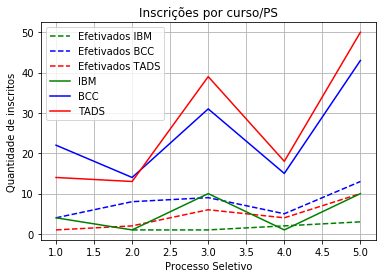

In [13]:
# Refazendo a contagem de inscritos de cada curso, apenas dos efetivados em cada PS
insc_efetivados_df = inscricoes_df.loc[inscricoes_df['Efetivado'] == 1]
insc_curso_efet_ps_df = insc_efetivados_df[['Nome', 'Curso', 'PS']].groupby(['Curso', 'PS']).count()
insc_curso_efet_ps_df = insc_curso_efet_ps_df.reset_index()

# Conjunto de 11 valores entre 0 e 50
y_label = np.linspace(0, 50, 6)

# Pegando membros de IBM
insc_ibm_efet_ps_df = insc_curso_efet_ps_df[insc_curso_efet_ps_df.Curso == 'IBM']
insc_ibm_efet_ps_df = insc_ibm_efet_ps_df.rename(columns={'Nome': 'Efetivados IBM'})
plt.plot(insc_ibm_efet_ps_df['PS'], insc_ibm_efet_ps_df['Efetivados IBM'], 'g--')

# Pegando membros de BCC 
insc_bcc_efet_ps_df = insc_curso_efet_ps_df[insc_curso_efet_ps_df.Curso == 'BCC']
insc_bcc_efet_ps_df = insc_bcc_efet_ps_df.rename(columns={'Nome': 'Efetivados BCC'})
plt.plot(insc_bcc_efet_ps_df['PS'], insc_bcc_efet_ps_df['Efetivados BCC'], 'b--')

# Pegando membros de TADS
insc_tads_efet_ps_df = insc_curso_efet_ps_df[insc_curso_efet_ps_df.Curso == 'TADS']
insc_tads_efet_ps_df = insc_tads_efet_ps_df.rename(columns={'Nome': 'Efetivados TADS'})
plt.plot(insc_tads_efet_ps_df['PS'], insc_tads_efet_ps_df['Efetivados TADS'], 'r--')

# Imprimindo as inscrições de cada curso
plt.plot(insc_ibm_ps_df['PS'], insc_ibm_ps_df['IBM'], 'g-')
plt.plot(insc_bcc_ps_df['PS'], insc_bcc_ps_df['BCC'], 'b-')
plt.plot(insc_tads_ps_df['PS'], insc_tads_ps_df['TADS'], 'r-')

plt.yticks(y_label)
plt.xlabel('Processo Seletivo')
plt.ylabel('Quantidade de inscritos')
plt.title('Inscrições por curso/PS')
plt.grid(True)
plt.legend()
plt.show()

Observa-se que mesmo nos PSs com uma quantidade mais elevada de inscritos de TADS, BCC continua tendo mais efetivações no final do processo. Como nossa base é incompleta, é impossível apontar a razão. Pode-se imaginar que a maioria acabe não indo na dinâmica e outras etapas

---

#### Analisando os **efetivados**

In [14]:
efetivados_df = inscricoes_df.loc[inscricoes_df['Efetivado'] == 1]

efetivados_df.describe()

,PS,Star,Efetivado,Papel
count,67.000000,5.0,67.0,11.0
mean,3.597015,1.0,1.0,1.0
std,1.349070,0.0,0.0,0.0
min,1.000000,1.0,1.0,1.0
25%,3.000000,1.0,1.0,1.0
50%,4.000000,1.0,1.0,1.0
75%,5.000000,1.0,1.0,1.0
max,5.000000,1.0,1.0,1.0


Pode-se ver que tivemos 26 membros efetivados.

Vamos analisar a distribuição dos "meios de chegada" dos membros que foram de fato efetivados:

In [15]:
efet_group_df = efetivados_df[['Amigos', 'Facebook', 'Semana Acadêmica', 'Semana dos Calouros', 'PS', 'Efetivado']].groupby(['PS']).count()
efet_group_df['Total de Inscrições'] = inscricoes_df[['Nome', 'PS']].groupby(['PS']).count()
display(efet_group_df)



,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Efetivado,Total de Inscrições
PS,,,,,,
1,1,1,0,3,5,40
2,5,7,2,0,11,28
3,0,0,0,0,16,80
4,8,2,0,4,9,34
5,12,6,0,5,26,103


Como não temos dados do Processo Seletivo de 2017-1, é difícil concluir algo. Entretanto, podemos observar que no PS de 2017-2 grande parte dos inscritos efetivados chegaram até a Ecomp por meio de amigos, mesmo havendo outros 25 inscritos.


---

# Analisando apenas o **PS-5**

In [16]:
#Pegando e copiando apenas os inscritos do PS-5
inscricoes_5_df = inscricoes_df.loc[inscricoes_df['PS'] == 5].copy()

# Preenche os vazios na coluna do papel com 0
inscricoes_5_df['Papel'] = inscricoes_5_df['Papel'].fillna(0)

display(inscricoes_5_df.head())

display(inscricoes_5_df.describe())
inscricoes_5_df.describe(include="O")

,Nome,GRR,Curso,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Site,Outro,PS,Star,Grupo,Entrevista,Trainee,Efetivado,Data da inscrição,Papel
182,Albano Roberto Drescher Von Maywitz,NaN,TADS,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,Reprovou,Desclassificado,Desclassificado,NaN,2018-02-20,1.0
183,André Vitor Kuduavski,GRR20184595,TADS,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,5,NaN,Faltou,Desclassificado,Desclassificado,NaN,2018-02-23,0.0
184,Athos Fernandez,20186203,TADS,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,5,NaN,Faltou,Desclassificado,Desclassificado,NaN,2018-02-22,0.0
185,Aurélio Shizuo Matsunaga,GRR20184615,TADS,NaN,NaN,NaN,NaN,Site,NaN,5,NaN,Faltou,Desclassificado,Desclassificado,NaN,2018-03-02,0.0
186,Bruno Henrique Kamarowski de Carvalho,20185067,BCC,NaN,NaN,NaN,Semana dos Calouros,NaN,NaN,5,NaN,Faltou,Desclassificado,Desclassificado,NaN,2018-03-04,0.0


,PS,Star,Efetivado,Papel
count,103.0,6.0,26.0,103.000000
mean,5.0,1.0,1.0,0.495146
std,0.0,0.0,0.0,0.502421
min,5.0,1.0,1.0,0.000000
25%,5.0,1.0,1.0,0.000000
50%,5.0,1.0,1.0,0.000000
75%,5.0,1.0,1.0,1.000000
max,5.0,1.0,1.0,1.000000


,Nome,GRR,Curso,Amigos,Facebook,Semana Acadêmica,Semana dos Calouros,Site,Outro,Grupo,Entrevista,Trainee,Data da inscrição
count,103,98,103,26,10,0.0,21,3,7,103,103,103,103
unique,103,98,3,1,1,0.0,1,1,4,3,4,4,17
top,Bernardo Ferrari,20182630,TADS,Amigos,Facebook,NaN,Semana dos Calouros,Site,Moodle,Passou,Desclassificado,Desclassificado,2018-02-21
freq,1,1,50,26,10,NaN,21,3,3,52,51,61,32


Podemos ver que tivemos um total de **103** inscritos e **51** inscrições no papel.

A maior parte dos inscritos é do curso de TADS, e a data com mais inscritos foi a do dia 21/02/2018.

Vamos observar o crescimento das inscrições ao longo do período de abertura do processo seletivo.

#Pegando os inscritos por dia

inscricoes_5_data_df = inscricoes_5_df.groupby(['Data da inscrição']).count()
inscricoes_5_data_df = inscricoes_5_data_df.rename(columns={'Nome': 'Inscritos'})
#display(inscricoes_5_data_df)

#Conjunto de 11 valores entre 0 e 120
y_label = np.linspace(0, 120, 11)

#Filtra as datas
x = inscricoes_5_df['Data da inscrição'].sort_values().unique()

#Soma as inscrições
y = np.cumsum(np.array(inscricoes_5_data_df['Curso']))

#Aumenta tamanho do plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(x,y)
for a,b in zip(x, y): 
    plt.text(a, b, str(b), fontsize=12,
        horizontalalignment='right',
        verticalalignment='bottom')
plt.yticks(y_label)
plt.xlabel('Datas')
plt.ylabel('Quantidade de inscritos')
plt.title('Crescimento das inscrições no PS 2018-1')
plt.grid(True)
plt.show()

#### Das etapas

Vamos analisar a presença dos inscritos na dinâmica

In [17]:
#Analisando quantos de cada curso foram na dinamica
display(inscricoes_5_df[['Grupo', 'Curso']].groupby(['Grupo']).count())

,Curso
Grupo,
Faltou,40
Passou,52
Reprovou,11


Dos **103** inscritos, 63 compareceram na dinâmica. Destes, 52 passaram e 11 reprovaram.

Vamos analisar essa distribuição relacionada a maneira de inscrição.

In [18]:
display(inscricoes_5_df[['Grupo', 'Curso', 'Papel']].groupby(['Papel', 'Grupo']).count())

Curso
Papel Grupo          
0.0   Faltou       20
      Passou       27
      Reprovou      5
1.0   Faltou       20
      Passou       25
      Reprovou      6

Podemos observar que a origem não influencia em **nada**. 
    - Dos 51 inscritos que vieram do papel, 20 não foram (aprox. 40%)
    - Dos 52 inscritos que vieram do forumulário, 20 também não foram (aprox. 40%)

In [19]:
#analisando quantos de cada curso foram na entrevista
inscricoes_5_df_dinamica = inscricoes_5_df.loc[inscricoes_5_df['Grupo'] == 'Passou']
inscricoes_5_df_dinamica.groupby(['Entrevista', 'Curso']).count()

Nome  GRR  Amigos  Facebook  Semana Acadêmica  \
Entrevista Curso                                                  
Faltou     BCC       1    1       1         0                 0   
Passou     BCC      18   17      10         4                 0   
           IBM       5    5       1         0                 0   
           TADS     19   18       4         2                 0   
Reprovou   BCC       5    5       2         0                 0   
           IBM       1    1       0         0                 0   
           TADS      3    3       1         0                 0   

                  Semana dos Calouros  Site  Outro  PS  Star  Grupo  Trainee  \
Entrevista Curso                                                               
Faltou     BCC                      0     0      0   1     0      1        1   
Passou     BCC                      2     0      0  18     3     18       18   
           IBM                      0     0      1   5     2      5        5   
           TADS                     6     0      1  19     1     19       19   
Reprovou   BCC                      2     0      0   5     0      5        5   
           IBM                      0     0      0   1     0      1        1   
           TADS                     1     0      0   3     0      3        3   

                  Efetivado  Data da inscrição  Papel  
Entrevista Curso                                       
Faltou     BCC            0                  1      1  
Passou     BCC           13                 18     18  
           IBM            3                  5      5  
           TADS          10                 19     19  
Reprovou   BCC            0                  5      5  
           IBM            0                  1      1  
           TADS           0                  3      3

Podemos observar que temos uma quantidade proporcional as inscrições de presença nas entrevistas!

Vamos analisar o período trainee.

In [25]:
inscricoes_5_df_trainee = inscricoes_5_df.loc[inscricoes_5_df['Entrevista'] == 'Passou']
inscricoes_5_df_trainee.groupby(['Trainee', 'Curso']).count()

/home/emm/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

---

##### Distribuição dos trainees por curso

Vamos observar quantos trainees de cada curso temos atualmente: 

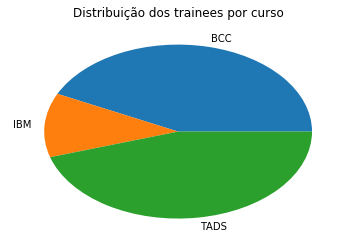

In [20]:
inscricoes_5_df_entrevista = inscricoes_5_df.loc[inscricoes_5_df['Entrevista'] == 'Passou']

x = inscricoes_5_df_entrevista.groupby(['Curso']).count()

plt.pie(x['PS'], labels=['BCC', 'IBM', 'TADS'])
plt.title('Distribuição dos trainees por curso')
plt.show()

In [21]:
#Alterando as categorias de etapas para numéricas
mapping = {"Faltou": 1, "Desclassificado": 2, "Reprovou": 3, "Passou": 4}

inscricoes_5_df['Grupo'] = inscricoes_5_df['Grupo'].map(mapping)
inscricoes_5_df['Grupo'] = inscricoes_5_df['Grupo'].fillna(0)

inscricoes_5_df['Entrevista'] = inscricoes_5_df['Entrevista'].map(mapping)
inscricoes_5_df['Entrevista'] = inscricoes_5_df['Entrevista'].fillna(0)

inscricoes_5_df['Trainee'] = inscricoes_5_df['Trainee'].map(mapping)
inscricoes_5_df['Trainee'] = inscricoes_5_df['Trainee'].fillna(0)